# Topic-specific corpus building: The creation of a representative newspaper corpus on the topic of return migration using LDA and JSD




#### 0.1 Sarah Oberbichler
Author, University of Innsbruck 


#### 0.2 Eva Pfanzelter
Author, University of Innsbruck 

<div>
<img src="images/cover.png" width="1000"/>
</div>

This  workhas  been  supported  by  the  European  Union  Horizon  2020  research  and innovation programme under grant 770299 (NewsEye).

Corpus Building, Return Migration, Historical Newspapers, Text Mining

#### Abstract 
Many researchers have the problem that their specialized corpora, created by keyword searching, either contain texts that are irrelevant to their research question because search queries are too broad or, on the other hand, miss relevant text because the search requests are too narrow. The reason for this is to be found in the difficult nature of language, which is characterized by ambiguity and concepts that are difficult, if not impossible, to trace by a simple keyword search alone. This paper shows how a topic-specific corpus addressing return migration issues can be created with the help of Latent Dirichlet Allocation (LDA) and the Jensen-Shannon Distance (JSD) method. The aim is, on the one hand, to build a corpus that is as representative as possible and, on the other hand, to avoid complex keyword research that is often influenced by the researcher's prior knowledge. The paper furthermore highlights the necessity of corpus building and the critical evaluation in the heuristic research step.


## 1 Creating a newspaper corpus on historical return migration movements 

Historiography based on digital sources raises the need to search for complex patterns in masses of information rather than gaps in the historical record (Haber, 2012). This development has led to a certain hybridity of classical and digital methods in historical research (Fickers, 2020), and goes along with methodological and epistemological challenges for the historical disciplines. It also calls for an extension of the historical method, which guides historical understanding through the three steps heuristics, source criticism and interpretation (Leyh, 1977). Especially the update on source criticism (which often goes hand in hand with tool criticism) has received much attention within the emerging field of digital hermeneutics (Fickers, 2020; Föhr, 2017; Koolen et al., 2019; Pfanzelter, 2010). Other parts of the historical method, like the relevance and critical assessment of adequate corpus creation in the heuristic research step, have so far not been considered enough. 

Historical research is often based on event- or topic-specific research questions, which is why specialized corpora are important in historical research. However, such corpora must be created in time-consuming and complex processes. Moreover, not every corpus is suitable for historical analysis. Historical corpus-driven studies (quantitative, but also qualitative) rely on the quality and representativeness of the selected collection to provide valid results. A distinction is made between external and internal criteria for corpus design and composition (Corpas Pastor and Seghiri, 2010). An important external criterion is the quality of the sources. This refers, on the one hand, to the reliability of the sources and, on the other hand, to the (OCR) quality of the data (e.g., if retro-digitized sources are being used). A second important external criterion is the representativeness of the sources. In the case of digitized newspapers, this includes the question whether the used digitized newspapers are representative for the needs of the research project or if important newspaper issues are missing out. In contrast, an internal criterion that affects the quality and representativeness of topic-specific corpora is the number of documents in a collection (Corpas Pastor and Seghiri, 2010). In this paper, we will focus on the internal criterion, highlighting the challenges for humanities researchers when creating a topic-specific corpus and presenting a possible approach to increase the representativeness of the corpus.

When keywords are being used to create specialized collections, researchers often have to weight up between a collection that misses relevant articles, and one which contains noise (i.e. irrelevant texts). In other words, there is a conflict between creating a corpus that contains only relevant texts but not all relevant texts available in the entire collection and, on the other hand, creating a corpus that contains all available relevant texts, but at the expense of including many irrelevant texts (Chowdhury, 2010; Gabrielatos, 2007). This is especially problematic when search terms are polysemous or ambiguous, as it is the case with German keywords related to return migration.

### 1.2 The motivation 

For Fairclough, newspapers are the ‘predominant social field' for the creation of information, beliefs or arguments, which are necessary ‘for establishing and sustaining economic, social and political systems and orders (Fairclough, 2013). While historical return migration has been little researched in scholarly contexts, newspapers indicate that return migration has certainly been an important topic within historical migration processes. The main motivation, therefore, was to produce empirical material for further qualitative and qualitative analysis on the topic of return migration. The research questions are as follows: What discourses accompanied the newspaper reporting on return migration. Where return migrants welcomed or perceived as a burden and thread when returning back to their country of origin? Can differences between groups of returning migrants be identified and have there been changes over the time? How did returnees depict themselves? Return migration or remigration can generally be defined as “cross-border migration to the country of origin” (Currle, 2006) or as the return of a person to the country of origin after spending a longer period of time abroad, even though no consistent definition exists within research literature. The return of emigrated people has, however, always been part of every migration movement – also in recent times. Examples include the return from overseas in the 19th and 20th century, the return of war veterans or the repatriation of war refugees during and after the First World War, or the return and repatriation of prisoners of war, refugees, exiles, concentration camp survivors, etc. during and after the Second World War.

In scientific literature, migration was often viewed as a one-way process, beginning with the ‘uprooting’ of people at the point of origin and ending with ‘assimilation’ into their adopted culture and country. Annemarie Steidl et al. (2017) phrased this as follow: “Although temporary and circular migration patterns are of a special importance for European people in modern times, they were neglected by migration research for decades”. Still, recent research indicates that many people left their home countries with the notion of returning home at a certain point not so far in the future. This is also true for those who left their home voluntarily to resettle in other countries. Migration is therefore neither a linear process, nor is a model that goes in both directions appropriate. In many cases, emigrants returned only temporary and left their country of origin again after a while.

Historical research on return migration considers such patterns of, and motivations for, return migration (Wyman, 2001), examines historical, political, sociological or economic backgrounds (Harper, 2012; Olivier, 2013; Poznan, 2017) or deals with autobiographical questions (Prager & Straub, 2017a). So far, however, the complexity and heterogeneity of sources about return migration (e.g., letters, photos, reports, statistical material on return, snippets of personal documentation, interviews, newspaper reporting) has complicated a structured analysis of the topic of return migration. The historical constellations were so diverse that generalizations are difficult to make and thus inherently faulty. What adds to the difficulties is the lack of empirical material. For example, it can still only be roughly estimated how many people who have emigrated voluntarily or involuntarily returned to their home countries (Prager & Straub, 2017b). The compilation of a corpus of empirical material (such as newspaper articles) is therefore still an essential factor if the topic of remigration is to be accessible for research. 

<table>
  <tr>
     <tr>
    <td>Figure 1: Das interessante Blatt, 12.12.1907, p. 1. </td>
    <td>Figure 2: Völkischer Beobachter, 15.10.19140, p. 3.</td>
  </tr>
    <td>
      <img src="images/return_migration.png" alt="Drawing" style="width: 400px";>
    </td>
    <td>
      <img src="images/rückwanderer.png" alt="Drawing" style="width: 400px;">
    </td>
    <td>


</table>

### 1.3 The challenges

As mentioned earlier, keyword searches often return a significant amount of irrelevant results or exclude too many relevant results. A common reason for this is to be found in the difficult nature of language. Synonymy and polysemy complicate keyword searches, but not alone. Linguistic ambiguity, word inflections, and concepts that do not equate to single words also play a significant role (Oberbichler and Pfanzelter, 2021).

Return migration as defined before and and the concepts associated with it are difficult to trace by keyword searches because of the following reasons:

1. Concepts are difficult to find using single keywords: There are only a few terms such as “Rückkehrer”, “Heimkehrer” or “Rückwanderer” (all German terms for “returnee”) that lead to exclusively relevant articles on return migration. However, they only cover a small amount of the whole spectrum of return migration reporting in newspapers. Return migration in the German language is often expressed by verbal constructions such as "kehrten in die Heimat zurück" ("returned home") or phrases such as "Rückkehr der Emigranten" (return of the emigrants).  

2. Word flexions complicate phrase searches or the combination of search terms: Phrase searches such as "heimkehrende Auswanderer" (returning emigrants) or the combination of keywords that occur together in a defined word distance such as "Rückkehr ... Auswanderer" (return ... migrants) are another way to improve the representativeness of a corpus. However, they involve a number of challenges; Firstly, it is difficult to find all kind of different combinations that would represent the topic in an adequate way. Secondly, it would be very time-consuming to consider all possible word flexions. Finally, even if it were possible to cover the topic of return migration in its entirety, many of the word combinations (e.g., "heimat zurückkehren" (returning home) would lead again to results that are not relevant for the research project. 

3. Same words have different meanings in different contexts (ambiguity): Expanding the search to more ambiguous words such as “return” or “returning" helps to find more relevant articles but often leads to a considerable amount of irrelevant search results as well. The process of identifying the actual meanings of words can be considered as one of the most challenging problems. The following texts show examples of relevant and non relevant articles on the topic of return migration found by using ambiguous search words (which means they have different meanings based on the context) such as "Heimkehr" (returning home) or "Rückkehr" (returning back). The first newspaper clipping contains the search term "Rückehr" (return) and reports about the return of an Austrian prisoner of war from Russia. This article is relevant for the present research project: 

In [7]:
import pandas as pd
import re
import re, numpy as np, pandas as pd
import csv
from pprint import pprint
df = pd.read_csv('data/export_returnmigration_16_04_2021_21_35.csv', usecols = ['text','relevancy'])
df['text'][56]

'* Rückwanderer aus Amerika. Samstag früh sind\n250 Amerikarückwanderer, zumeist österreichisch=ungarische Staatsangehörige, mit einem Zuge im Ostbahnhof angekommen. Die\nLeute, Männer, Frauen und Kinder, wurden auf der Heimreise\nerst in Liverpool angehalten. Dann kamen sie nach Belgien.\nSie waren in Antwerpen und sind dort großen Drangsalierungen\nausgesetzt gewesen. Von Holland aus konnten sie schließlich die\nHeimreise antreten. Im Bahnhof wurden sie von Mitgliedern\ndes Roten Kreuzes und Beamten der israelitischen Kultusgemeinde empfangen, gelabt und verköstigt. Danach erfolgte ihre\nHeimbeförderung. Die ungarische Regierung hat den Ministerialrat v. Jekelfalussy hieher entsendet, damit er die ungarischen Staatsbürger in seinen Schutz übernehme.'

The second articles writes about the homecoming ("Heimkehr") of students during their school holidays and can be labeled as not useful for the reserach project on return migration. 

In [8]:
df['text'][111]

'London.\nvon Auslandgeldern aus\nLondoner Dienst der „Neuen Freien Presse“.\nLondon, 4. März. „Times“ schreibt über die Sterlingverkäufe auf den ausländischen Märkten: Das neue Abgleiten des Pfundkurses, das nun auf die etwa\n1Oprozentige Abwertung des Jahres 1934 folgt, ist hauptsächlich eine Folge der Rückwanderung der\nansländischen Fonds, die in den Jahren 1932 bis\n1933 in sehr hohen Beträgen nach London gesandt worden\nwaren. Die Umkehrung dieser Bewegung hat verschiedene\nUrsachen. Zum Beispiel hat die Fixierung der\nRelation zwischen Gold= und Dollarpreis im vorigen\nJahr eine beträchtliche Rückwanderung amerikansschen Geldes\nnach den Vereinigten Staaten mit sich gebracht. Ein weiterer\nFaktor, der zur Abschwächung des Pfundes beitrug, ist die\nniedrige Zinsrate in London im Verhältnis zu\njeuer der Goldblockländer.'

All these challenges make it necessary to consider more advanced and complex techniques for the corpus compilation.

## 2 Methods to improve the representativeness of specialized corpora

There are a number of methods to improve the representativeness of specialized corpora. Search techniques such as Boolean queries from the area of information retrieval, for example, can be a great help to refine searches and to find relevant information. However, for the creation of topic-specific corpora, the search for texts containing specific information (e.g., a combination of words) can impose bias (Chowdhury, 2004). Another method that draws on techniques used in information retrieval is the Relative Query Term Relevance (RQTR) method. RQTR is an approach to formulate a complex query for a topic-specific corpusa by calculating the degree of precision and recall of a query. This means that the RQTR method is based on the combination of keywords (candidate term and core query) calculating the relevance of the candidate term (e.g., the relevance of the term Hamas for the topic on refugees). If a candidate term has a clear positive RQTR score, it can add more relevant texts to a corpus. If the score is negative, it would add too much noise to a corpus (Gabrielatos, 2007). This approach can also be adapted to reduce the issue of polysemous (that is multi-part) and ambiguous query terms, as Daniel Malone (2020) suggests. In this case the RQTR method was used to find good keywords which were combined with an ambiguous search term to reduce the number of irrelevant articles. This method, however, can be very time-consuming and influenced by the researcher’s choice of candidate terms. Finally, Word Sense Disambiguation (WSD) from the Natural Language Processing (NLP) area includes methods that are meant to deal with ambiguous search terms. WSD can be described as "task of associating the correct meaning with a word in a given context" (Pasini and Navigli, 2020). WSD techniques can be knowledge-based (e.g., dictionaries), supervised (uses machine-learning technique from manually annotated data) or unsupervised. Unsupervised WSD methods assume that similar senses occur in similar contexts (Pal and Saha, 2015; Navigli 2009) and learn from unlabelled text.

### 2.1 Word Sense Disambiguation - An Approach using Topic Modeling and the Jensen Shannon Distance  (JSD) method

Word Sense Disambiguation (WSD) can overcome some of the mentioned challenges. They derive the actual meanings of the words, and their underlying concepts, rather than by simply matching character strings like keyword search technologies. In this paper, an unsupervised similarity-based WSD approach using topic modeling (gensim library) and the Jensen-Shannon Distance (JSD) method in combination with manual annotations is used to create a corpus on the topic of return migration. While the similarity measure is unsupervised and based on the whole context of a document, the final classification is supported by the annotations in the training corpus. The goal of this approach is to better distinguish between relevant and irrelevant newspaper clippings. The method calculates the probability of a newspaper article being relevant or not relevant to the research project. For this purpose, each individual newspaper article is compared with each other, while the manual annotations support the assignment to one of the categories (relevant or irrelevant). The motivation of this paper is not to compare or evaluate different approaches but to show how the quality of a topic-specific corpus improved to such an extent that historical research questions can be answered. And although the discussion will draw on the work carried out as part of this project, the approach presented in this paper can be adapted for research projects that deal with similar language issues.

In order to use machine learning to support the building of a representative corpus on return migration, this process started with the creation of a manually annotated training and testing collection - containing relevant as well as non-relevant articles on the topic of return migration. This pre-annotated dataset is important for the calculation of the relevancy-probability and to successfully distinguish between relevant and non-relevant articles (which will by explained step by step in the hermeneutical layers of this paper). In total, 202 newspaper clippings were collected using following search terms: "Rückkehr" (returning back), "Heimkehr" (returning home), "heimgekehrt*" ((people who) returned home), "Rückwanderer" (returnees), "Rückwanderung" (return migration), "Heimkehrer" (returnees), "heimkehrend*" ((people who) are returning). Four Austrian newspapers, which where provided by the National Library of Austria (ONB) in the context of the NewsEye project, were used for the manually created corpus: The *Neue Freie Presse*, the *Arbeiter-Zeitung*, the *Illustrierte Kronen Zeitung* and the *Innsbrucker Nachrichten*. 

## Providing a manually annotated training and testing corpus

The search and the building of the sample collection was performed with the beta version of the <a href="https://platform.newseye.eu" target="_blank">NewsEye Platform</a> (Jean-Caurant & Doucet, 2020). This platform allows to create and manage datasets as well as adding annotations to the dataset. As can be seen in Figure 3, a total number of 130 articles were manually annotated as relevant (by assigning the number 3) and 89 articles were annotated as irrelevant (by assigning the number 0). While creating and annotating the dataset, value was placed on the representativity of the collection (in covering all possible topics and time frames). For the text classification, Latent Dirichlet Allocation (LDA), which belongs to the broader category of methods called topic models, was used to group semantically related words (Blei, Ng, & Jordan, 2003). 

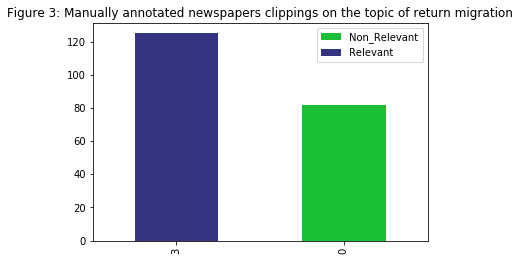

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
my_colors = [(0.20,0.200,0.50), (0.100, 0.75, 0.200)]

df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20))
df.relevancy.value_counts().plot(kind='bar', color = my_colors)

plt.legend(['Non_Relevant', 'Relevant'])

plt.title('Figure 3: Manually annotated newspapers clippings on the topic of return migration')
plt.show()

Thanks to layout analysis and article separation, which devide OCRed (Optical Character Recognized) text into news-units, functions to build a dataset as well as the possibility to mark articles as relevant, less relevant or not relavant in the NewsEye platform, the creation of a manual annotated corpus was fast and relatively easy. In addition, the export functions, which allow to export a collection as a Zip, JSON or CSV file, make it possible to import the collection within a coding environment such as *Jupyter* Notebooks. All export files contain metadata as well as the original texts. Within the NewsEye project, a dataset of some 1.5 million pages from the participating national libraries of Austria, France, and Finland was re-OCRed with Transkribus by the partners at the University of Innsbruck, using several specifically trained models that were improved by computer scientists of the project at the University of Rostock. The process led to impressive improvements in OCR quality when compared to the text currently available for the same newspapers, producing output with character error rates below 1 %. The high quality of texts allows to work with retro-digitized newspapers without having to caunt with bigger distortions caused by OCR errors. Layout segmentation and article separation for newspapers, however, are still highly error-prone, and computer scientists from the University of Rostock are constantly working on improving automated article separation, the task to computationally identify articles the same way as humans do, remains challenging. In the meantime, to meet the problem of under-/over-segmentation of articles, functionalities that allow to manually merge text blocks have been proven as very useful. For the creation of smaller datasets and subcollections, this is a highly relevant feature, which is especially important for researchers who are engaging in qualitative analysis, close and wide reading and who want to be able to export entire article collections for further analysis.  
 

## 
Before the topic models were trained, the collection was pre-processed. In doing so, words were tokenized and stop words as well as too short articles (less then 30 tokens) were removed.


The training corpus contains 131 articles, 79 of which relevant and 52 irrelevant.
The test corpus consists of 76 articles, 46 of which relevant and 30 irrelevant.


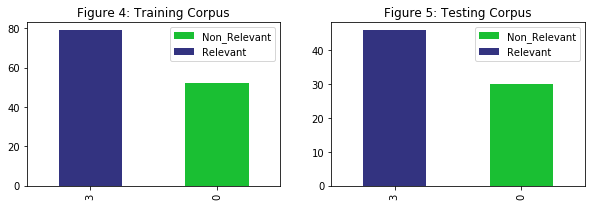

In [10]:
my_colors = [(0.20,0.200,0.50), (0.100, 0.75, 0.200)]
#msk = np.random.rand(len(df)) < 0.599
#train_df = df[msk]
#train_df.reset_index(drop=True,inplace=True)

#test_df = df[~msk]
#test_df.reset_index(drop=True,inplace=True)

#train_df.to_csv('train_2.csv')
#test_df.to_csv('test_2.csv')

train_df = pd.read_csv('data/train_2.csv')
test_df = pd.read_csv('data/test_2.csv')

fig, axes = plt.subplots(1,2,figsize=(10,3))
test_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[1])
test_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[1])
train_df.relevancy.value_counts().plot(kind='bar', color = (0.100, 0.75, 0.20), ax=axes[0])
train_df.relevancy.value_counts().plot(kind='bar', color = my_colors, ax=axes[0])
axes[1].legend(['Non_Relevant', 'Relevant'])
axes[0].legend(['Non_Relevant', 'Relevant'])
axes[1].title.set_text('Figure 5: Testing Corpus')
axes[0].title.set_text('Figure 4: Training Corpus')



print(f"The training corpus contains {len(train_df)} articles, {train_df.relevancy.value_counts()[3]} of which relevant and {train_df.relevancy.value_counts()[0]} irrelevant.")
print(f"The test corpus consists of {len(test_df)} articles, {test_df.relevancy.value_counts()[3]} of which relevant and {test_df.relevancy.value_counts()[0]} irrelevant.")   

In [11]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
import spacy

# Functions to clean, tokenize, and lemmatize the data
def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower() 
    text = nltk.word_tokenize(text)
    return text

#Remove stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('german')
# add stop words manually
stop_words.extend(["Heimkehr", "Rückkehr", "heimkehren", "zurückkehren", "a", "ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

#Stemming
stemmer = PorterStemmer()
def stem_words(text):
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] 
    except IndexError: 
        pass
    return text

#Apllying all functions 
def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))

train_df['tokenized'] = train_df['text'].apply(apply_all) 
test_df['tokenized'] = test_df['text'].apply(apply_all)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c62255\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In a second step, the collection was divided into a training corpus and a test corpus, using a mask of binary values. This made it possible to have a good mix of relevant and non relevant articles in each of the corpora. 

Topic models are based on the assumption that a relatively small set of latent topics underlie natural language texts, while one word can belong to multiple topics. Topic modeling is used for various needs: understanding given topics in a corpus, getting a better insight into the type or genre of documents in a corpus (news, advertisement, etc.), capturing the evolution of topics and trends within multilingual collections (Zosa and Ganroth-Wilding, 2019), or finding the most similar documents from a corpus. Topic modeling is an unsupervised machine learning technique that automatically clusters word groups and similar expressions that best characterize a set of documents. Therefore, it is well suited for the classification of relevant and non-relevant texts using similarity measures.

The manually created corpus was split in a training and testing corpus. The testing corpus was used to train the topic modeling algorithm, while the test corpus helped to test the efficiency of the similarity measure. While LDA was used to group words and similar expressions that best characterize relevant or irrelevant documents for the topic on return migration and to provides every article with information on their topic distribution, the Jensen-Shannon Distance (JSD) method was used to measure the similarity between the topic distribution of two documents.

## Latent Dirichlet Allocation (LDA) models

In [12]:
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import gensim.corpora as corpora
import gensim, spacy, logging, warnings
from gensim.models import CoherenceModel
from gensim.utils import lemmatize, simple_preprocess

def train_lda(data):
    num_topics = 250
    chunksize = 200
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low beta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=0.2e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=5, iterations=200, random_state=1)
    return dictionary,corpus,lda
dictionary,corpus,lda = train_lda(train_df)

The topics obtained via LDA are used to calculate similarity and predictions for each word in the document. For the topic on return migration, a high number of topics (250 in this case) leads to the better results. In order to see how well the dominant topics are separated between relevant (3) and non-relevant (0) articles, a network visualization was plotted using the Python packages Pandas and Networkx. For the network visualization, the most dominant topic for each newspaper clipping in the training corpus were calculated. This makes it possible to visualize relevant and non relevant newspaper clippings together with their dominant topics. This visualization helps to see how effective the models were trained. The fewer articles share the same dominant topic, the better the results: 

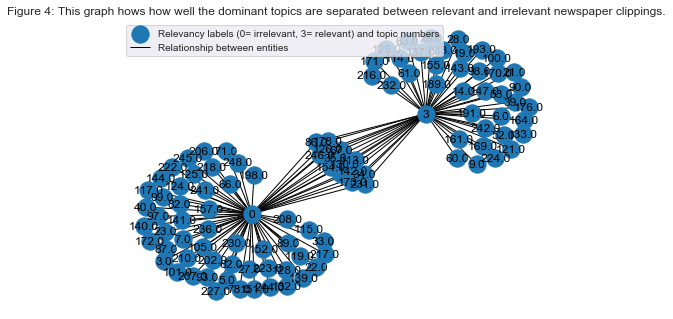

In [13]:
import networkx as nx
import seaborn as sns
sns.set_style("darkgrid")
import sys
def format_topics_sentences(ldamodel=None, corpus=corpus, relevancy=df['relevancy']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for s, (topic_num, prop_topic) in enumerate(row):
            if s == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add relevancy to the end of the output
    contents = pd.Series(relevancy)
    
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, relevancy=df['relevancy'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Relevancy']

df_dominant_topic.to_csv('topic_relevancy.csv')
import csv
with open('topic_relevancy.csv',  encoding="utf8") as infile:
    reader = csv.reader(infile)    
    csv_data = list(reader)
df_dominant_topics= pd.read_csv('topic_relevancy.csv', usecols = ['Dominant_Topic', 'Relevancy'])
list_topic = []
for key in csv_data: 
    list_topic.append(key[2])
topic = list_topic[1:]

list_relevancy = []
for key in csv_data:
    list_relevancy.append(key[5])
relevance = list_relevancy[1:]   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from': relevance, 'to': topic})

# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to')
# Plot it
nx.draw(G, with_labels=True)
plt.legend(('Relevancy labels (0= irrelevant, 3= relevant) and topic numbers', 'Relationship between entities'),
           loc='upper left')
plt.title('Figure 4: This graph hows how well the dominant topics are separated between relevant and irrelevant newspaper clippings.')
plt.show()


JSD measures which documents are statistically “closer” (and therefore more alike) by comparing the divergence of their topic distributions. The smaller the distance, the more similar two articles are. Consequently, the topic distribution of each new article (from the test corpus) was compared to the topic distribution of all articles in the trained corpus.The combination of LDA and JSD to group similar articles, documents or groups of documents has been described in several computer science research papers (Fothergill et al., 2016; Lu et al., 2019; Niekler & Jähnichen, 2012). What distinguishes this work is the way how manual annotations were used to support the classification process. This new approach resulted from a long process of evaluation, close reading the results and thinking about new application possibilities followed this work. The found solution was simple and exceedingly successful, but never used in this context so far: For each article in the test corpus, the ten most similar articles from the training corpus were extracted. These articles carry the information about the manually assigned relevancy. If 60 percent of the automatically found similar articles were annotated as relevant, the new article was marked as relevant, too. Otherwise it was marked as irrelevant. The whole process was driven by the goal of using these methods was to create a topic-specific corpus on return migration, which is representative and can be used for further, qualitative analysis.


<table><tr>
    <caption align="top">Figure 5: This example shows the recommendation of the ten most similar articles for one unseen article of the test corpus. The relevance levels tell whether the articles were manually classified as relevant or as irrelevant. </caption>
    <td> <img src="images/figure.png" alt="Drawing" style="width: 700px;"/> </td>
</tr></table>




This was working surprisingly well, as can be seen in the output and in the calculation of the score:

.... 

In [ ]:
from scipy.stats import entropy
def jensen_shannon(query, matrix):
    p = query[None,:].T 
    q = matrix.T 
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))
def get_most_similar_documents(query,matrix,k=10):
    sims = jensen_shannon(query,matrix) 
    return sims.argsort()[:k] 


#lists for the output

text_relevant = []
number_relevant = []
text_non_relevant = []
number_non_relevant = []

#most similar articles and select between relevant and non-relevant

index = 0
while index < len(test_df) -1:
    index +=1
    new_bow = dictionary.doc2bow(test_df.iloc[index,3])
    new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])
    doc_topic_dist = np.stack([np.array([tup[1] for tup in lst]) for lst in lda[corpus]])
    doc_topic_dist.shape
    most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    relevant = []
    if sum(most_similar_df['relevancy']) > 17: 
        text_relevant.append(test_df.iloc[index,2])
        number_relevant.append(test_df.iloc[index,1])
    else:
        text_non_relevant.append(test_df.iloc[index,2])
        number_non_relevant.append(test_df.iloc[index,1])
    pass

#Create a dataframe with the automatically selected relevant and non-relevant articles

df_relevant = pd.DataFrame(np.column_stack([text_relevant, number_relevant]), 
                               columns=['Relevant_Text', 'Real_Relevancy'])

df_non_relevant = pd.DataFrame(np.column_stack([text_non_relevant, number_non_relevant]), 
                               columns=['Unrelevant_Text', 'Real_Revelancy'])


df_results = pd.concat([df_relevant,df_non_relevant], ignore_index=True, axis=1)
df_results.columns=['This text was classified as relevant = ', '3','This text was classified as irrelevant =', '0']
df_results.head(20)


In [ ]:
rev_3 = []
for key in df_results['3']:
    if key == '3':
        rev_3.append(key)
rev_0 = []
for key in df_results['3']:
    if key == '0':
        rev_0.append(key)
non_rev_3 = []
for key in df_results['0']:
    if key == '3':
        non_rev_3.append(key)
non_rev_0 = []
for key in df_results['0']:
    if key == '0':
        non_rev_0.append(key)
result_right = len(non_rev_0) + len(rev_3)
result_wrng = len(non_rev_3) + len(rev_0)
all_ = len(non_rev_3) + len(rev_0) + len(non_rev_0) + len(rev_3)
score = result_right / all_
f" In total, {score} per cent of the selected articles have been classified correctly."

The goal of ... using the whole corpus ... 


## 3 After the corpus building is before the corpus building

For historians conducting qualitative research, the process of corpus formation ends when a corpus allows for qualitative, close reading-based evaluations. Therefore, a created corpus can divided into further sub-corpora, e.g., the subcorpus on remigrants from America within the entire collection on return migration. Using keyword search, 

 ### 3.1 Qualitative Analysis of the Austrian Media Discourse on returnees from America between 1850 and 1950

(Critical) discourse analysis ‘examines how texts represent and construct reality within a specific ideological system through implicit messages based on what is said and left unsaid’ (Heros, 2009). Discourse analysis therefore can help
scholars to understand how social interaction constitutes topics and concepts and how they change over time, whereas conceptual history, by comparison, focuses on the thinking and structures of knowledge behind the use of words. Historical-semantic discourse analysis thus can open up semantic aspects and elements of knowledge that could escape a purely word-oriented history of meaning (Busse, 2008).

There are no exact numbers of how many people returned from America to Austria-Hungary between 1850 and 1950. Mark Wyman, for example, speaks of 17 to 27 percent returnees before 1909. The United States Labor Department counted the return of emigrants between 1908 and 1923 and noted their nationality or race. 66 percent were Hungarian, 57 percent Slovak, 19 percent Czechs and 18 percent Germans. Numbers of returnees after 1923 do not exist.  

People who emigrated by their own choice and later decided to come back to their homelands had different reasons for their decisions to return: success, failure, homesickness, rejection in the new country, changes in the economic or socio-political conditions in their native countries, or perhaps family members asked them to return. On of the first stories an a return migrant from America can be found in Ferdinand Kürnberger's novel "Der Amerika-Müde" (1855), which was published in 1855. This books made reference to the American experience of the Austrian writer Nikolaus Lenau. Lenau left for America in 1832 with the aim of emigration without much preparation and because of private problems (breaking off with medical studies and failed love story) and returned back to Europe as early as 1833. Disappointed by his impressions and his experiences in Baltimore, Pennsylvania, Ohio and the Niagara Falls, Lenau returned back to Austria full of homesickness. Neither had he found the land of freedom, nor had he been able to secure himself materially. Also for his poetry, America had given only few incentives.  Only eight days after his arrival in Baltimore he wrote: "Brothers, these Americans are petty minded people who turn the heavens’ stomachs. Dead to all things intellectual, as dead as a doornail” (Kürnberger, 1855).


1. **Return migration is restricted (R=restricted)**: Returnees from America were not always welcome in Austria. Particularly when mass return movements triggered by economic crises broke out, measures of containment were also undertaken. One way of doing this was to raise ship prices so that people could not afford the return trip. But selective approaches were also taken. For example, a report from 1907 states that only those who had enough money to build a life for themselves in Austria should return to Europe.


In [ ]:
from IPython.display import SVG, HTML
import pygal 
from pygal.style import DarkStyle

dot_chart = pygal.Dot(dots_size=300, legend_box_size=6, x_label_rotation=70, style=DarkStyle, height=400,legend_at_bottom=True, legend_at_bottom_columns=4)

dot_chart.title = 'Return from America - Discourses'
dot_chart.x_labels = ['1872-73', '1874-75', '1876-77', '1878-79','1880-81', '1882-83', '1884-85', '1886-87', '1888-89', '1890-91', '1892-93', '1894-95', '1896-97', '1898-99', '1900-01', '1902-03', '1904-05', '1906-07', '1908-09', '1910-11', '1912-13', '1914-15', '1916-17', '1918-19', '1920-21', '1922-23', '1924-25', '1926-27', '1928-29', '1930-31', '1932-33', '1934-35', '1936-37', '1938-39', '1940-41', '1942-43', '1944-45', '1946-47', '1948-49']
dot_chart.add('R=enhanced',    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 3, 9, 7, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 6, 1, 4])
dot_chart.add('R=restricted',  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('R=useless',      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('Delusion',   [4, 6, 3, 1, 0, 0, 0, 0, 1, 0, 5, 3, 2, 0, 0, 0, 2, 1, 0, 6, 4, 1, 0, 0, 2, 0, 2, 0, 0, 4, 0, 0, 0,0, 1, 0, 0, 0])
dot_chart.add('R=useful',       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 13, 8, 6, 1, 9, 7, 3, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 1, 0])
dot_chart.add('R=danger',       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 12, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
dot_chart.add('A=overloaded',   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dot_chart.add('A=support',        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 1, 2, 7, 7, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 11, 0, 0, 0, 0, 4])

display(SVG(dot_chart.render(disable_xml_declaration=True)))



## Conclusion